**Name:** <span style="color:red">Jan Izquierdo, Carmen Samedi</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Solving the master equation


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

The aim of this practical is to solve the master equation of a birth-death processes in different situations. We will begin with the case of ***constitutive expression***. To that end, we will first write a computer code that calculates, following the steps described in class, the stationary probability density $P(n)$ of a birth-death process with constitutive expression ($C(n)=\alpha$, $D(n)=\delta n$), which we will use as a control in what follows, and plot the resulting distribution $P(n)$. Use the following parameter values: $\alpha=10$, $\delta=1.$

The solution of the master equation for this constitutive expression case can be obtained analytically, and shown to correspond to the Poisson distribution:
$$
p(n)=\frac{\lambda^n}{n!}\exp(-\lambda),
$$
where $\lambda=\alpha/\delta$ is the deterministic solution. Compare the numerical solution that you have obtained with the analytical expression of the Poisson distribution, and with the deterministic equilibrium of the system

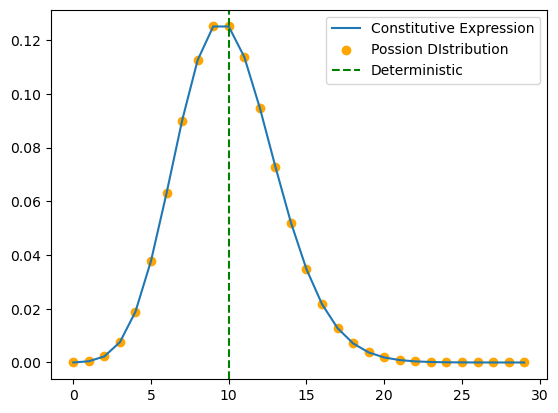

In [9]:

a=10 #alpha=birth rate
d=1 #delta

lmb=a/d #deterministic solution

n_max=30 #n size (0 to n_max means final number will be n_max-1)

#Follow the formula for analytical probability
def prob_density_A(n):
    
    p_n=(lmb**n/math.factorial(n))*np.exp(-lmb)
    return p_n

#Calculate numerical probability
#d*n is the death rate
#The birth-death rate of each population is equal to the previous population's_rate*the current rate
def prob_density_N(n, ls_num):

    current_dRate=ls_num[n-1]*a/(d*n) #ratio = previous population birth-death rate*current rate
    return current_dRate

ls_analytical=[0]
ls_numerical=[1] #First population has rate of 1

#iterate for population that goes from 1 to 100
for n in range(1,n_max):
    ls_analytical.append(prob_density_A(n))
    ls_numerical.append(prob_density_N(n, ls_numerical))

#Normalize numerical to sum(ls_numerical)=1 so it fits with analytical
ls_numerical=ls_numerical/np.sum(ls_numerical)


x_values=np.arange(n_max)

plt.plot(x_values, ls_analytical, label="Constitutive Expression")
plt.scatter(x_values, ls_numerical, color="orange", label="Possion DIstribution")
plt.axvline(x=lmb, color='green', linestyle='--', label="Deterministic")
plt.legend()

---

<span style="color:red"> 
The constitutive expression is a case where the birth rates are constant and the death rates are proportional to the population size which fits perfectly a poisson dostribution since it represents well the stochastic noise of a cell. The deterministic line being right where the peak of the graph is makes sense since that would be the point where there is as much production as degradation.This would represent a quite simple biological process as it doesn't include a feedback or any kind of regulation there is just production until the death of everything and then the birth and the cycle all over again. It could represent an unregulated gene exoression or maybe a production that isn't influenced. 
</span>

---

In [10]:
print("probability of where the ss is going to be deterministic simulation is diff eq  Stochastic  → what is the exp value ofthe ss and what is to be deviated from that? 3 cases: 1 constitutive expression  distribution at the steady stateNEg feedback  how it changes  compared to constitutive exp different forumla different distribution normla  mathematical descritpion and tie it to underlying biology   pos feedback  comparing to what weve see before 1st const compare to poisson distri use master eq to come up w dsitr and plot the blue line and then plot the poisson  for the orange dotted like find in the notes the master eq creation term death and more"
)

probability of where the ss is going to be deterministic simulation is diff eq  Stochastic  → what is the exp value ofthe ss and what is to be deviated from that? 3 cases: 1 constitutive expression  distribution at the steady stateNEg feedback  how it changes  compared to constitutive exp different forumla different distribution normla  mathematical descritpion and tie it to underlying biology   pos feedback  comparing to what weve see before 1st const compare to poisson distri use master eq to come up w dsitr and plot the blue line and then plot the poisson  for the orange dotted like find in the notes the master eq creation term death and more


Next, write another computer code that calculates the stationary probability density $P(n)$ of a birth-death process with negative feedback (defined by $C(n)=\frac{\alpha_n}{1+n/k}$), with $\alpha_n=55$ and $k=2$.

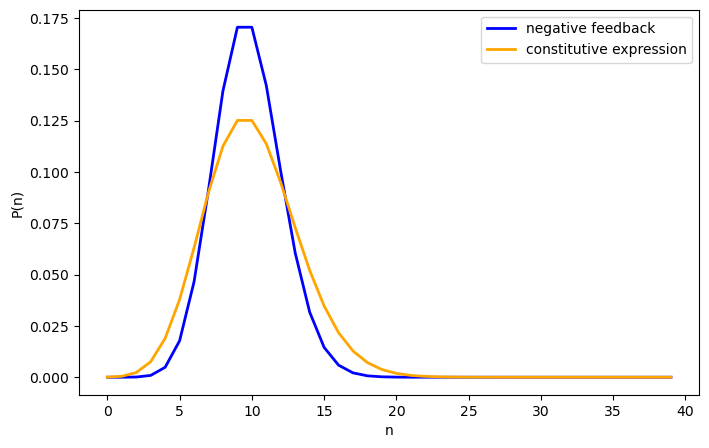

In [11]:
alpha_constitutive = 10   
delta = 1                
n_max = 40   

alpha_feedback = 55       
k_feedback = 2            

# Deterministic solution for the constitutive expression (mean of Poisson)
lambda_constitutive = alpha_constitutive / delta

# constitutive expression 
def prob_density_constitutive(n, lambda_val):
    return (lambda_val**n / math.factorial(n)) * np.exp(-lambda_val)

# Birth rate with negative feedback
def birth_rate_feedback(n, alpha, k):
    return alpha / (1 + n / k)

# negative feedback case
def prob_density_negative_feedback(n_max, alpha, delta, k):
    P = [1.0]  # Start with arbitrary P(0), will normalize later
    for n in range(1, n_max):
        # Calculate probability using birth and death rates for each n
        P_n = (P[n-1] * birth_rate_feedback(n-1, alpha, k)) / (delta * n)
        P.append(P_n)
    # Normalize so that sum(P) = 1
    P = np.array(P)
    return P / np.sum(P)

# Generate the probability distributions
constitutive_probs = [prob_density_constitutive(n, lambda_constitutive) for n in range(n_max)]
feedback_probs = prob_density_negative_feedback(n_max, alpha_feedback, delta, k_feedback)

n_values = np.arange(n_max)
plt.figure(figsize=(8, 5))
plt.plot(n_values, feedback_probs, label="negative feedback", color="blue", linewidth=2)
plt.plot(n_values, constitutive_probs, label="constitutive expression", color="orange", linewidth=2)

plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.show()

---

Compare **<span style="color:red">here</span>** the results of the constitutive expression and the negative feedback cases. Which one is more variable? Relate this result with the properties of the negative feedback discussed in class. 

<span style="color:red"> 
We can see that both models seem to follow a very similar distribution, there are still however differences. the most notable difference in te fact that the negative feedback' peak is much higher than the constitutive expression, meaning its steady state is achieved later. We can also see a much narrower curve with the negative feedback in comparison to the constitutive expression. This could be due to the mechanism itself, since negative feedback acts more like a switch, the change to and from the steady state are more abrupt. As for the constitutive expression, the curve is a bit wider because there is no immediate reaction, it shows more variability.
</span>


---

Finally, calculate the stationary probability density $P(n)$ of a birth-death process with cooperative positive feedback with leakiness (defined by $C(n)=\alpha_0+\frac{\alpha_p n^p}{k^p+n^p}$), with $\alpha_0 = 10$, $\alpha_p=75$, $p=4$, and $k=40$.

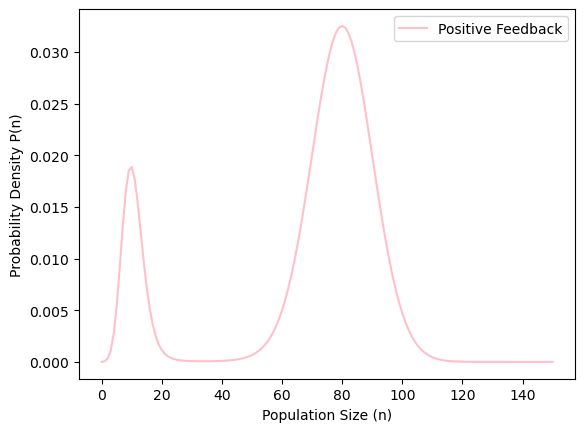

In [12]:
alpha_0 = 10    # Basal birth rate
alpha_p = 75    # Maximum additional birth rate due to positive feedback
p = 4           # Cooperativity factor
k = 40          # Feedback threshold
delta = 1       # Per capita death rate
n_max = 150     # Range of n to capture effects of cooperative feedback

# Function for the birth rate with cooperative positive feedback and leakiness
def C_positive_feedback(n):
    return alpha_0 + (alpha_p * n**p) / (k**p + n**p)

# Initialize P(n) with P(0) = 1 for convenience; it will be normalized later
P_n = np.zeros(n_max + 1)
P_n[0] = 1.0  # Arbitrary starting point for probability at n = 0

# Calculate P(n) iteratively for n = 1 to n_max
for n in range(1, n_max + 1):
    P_n[n] = (C_positive_feedback(n - 1) / (delta * n)) * P_n[n - 1]

# Normalize P(n) 
P_n /= np.sum(P_n)

n_values = np.arange(0, n_max + 1)
plt.plot(n_values, P_n, label="Positive Feedback", color="pink")
plt.xlabel("Population Size (n)")
plt.ylabel("Probability Density P(n)")
plt.legend()
plt.show()


---

<span style="color:red">Comment your result here. In particular, relate this result with the properties of the positive feedback discussed in class.</span>



<span style="color:red"> 
We can observe that in constrast to negative feedback, we have two peaks! These two peaks are logical as they represent the two steady states that happen with positive feedback. We can also see the curve being a bit wider than the negative feedback curve showing a bit less of a switch attitude, it looks more like the constitutive expression. THis positive feedback is more variable than the negative feedback. 
</span>

---